In [2]:
# import necessary modules
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
# read the T-P data
df = pd.read_csv('./original data/T-P.csv')

In [7]:
# show the first five lines of df
df.head()

,T (°C),relative_P (Kpa),real_P (Kpa)
0,32.00,-81.46,19.74
1,40.00,-78.07,23.13
2,49.99,-71.05,30.15
3,52.46,-67.13,34.07
4,54.98,-62.96,38.24


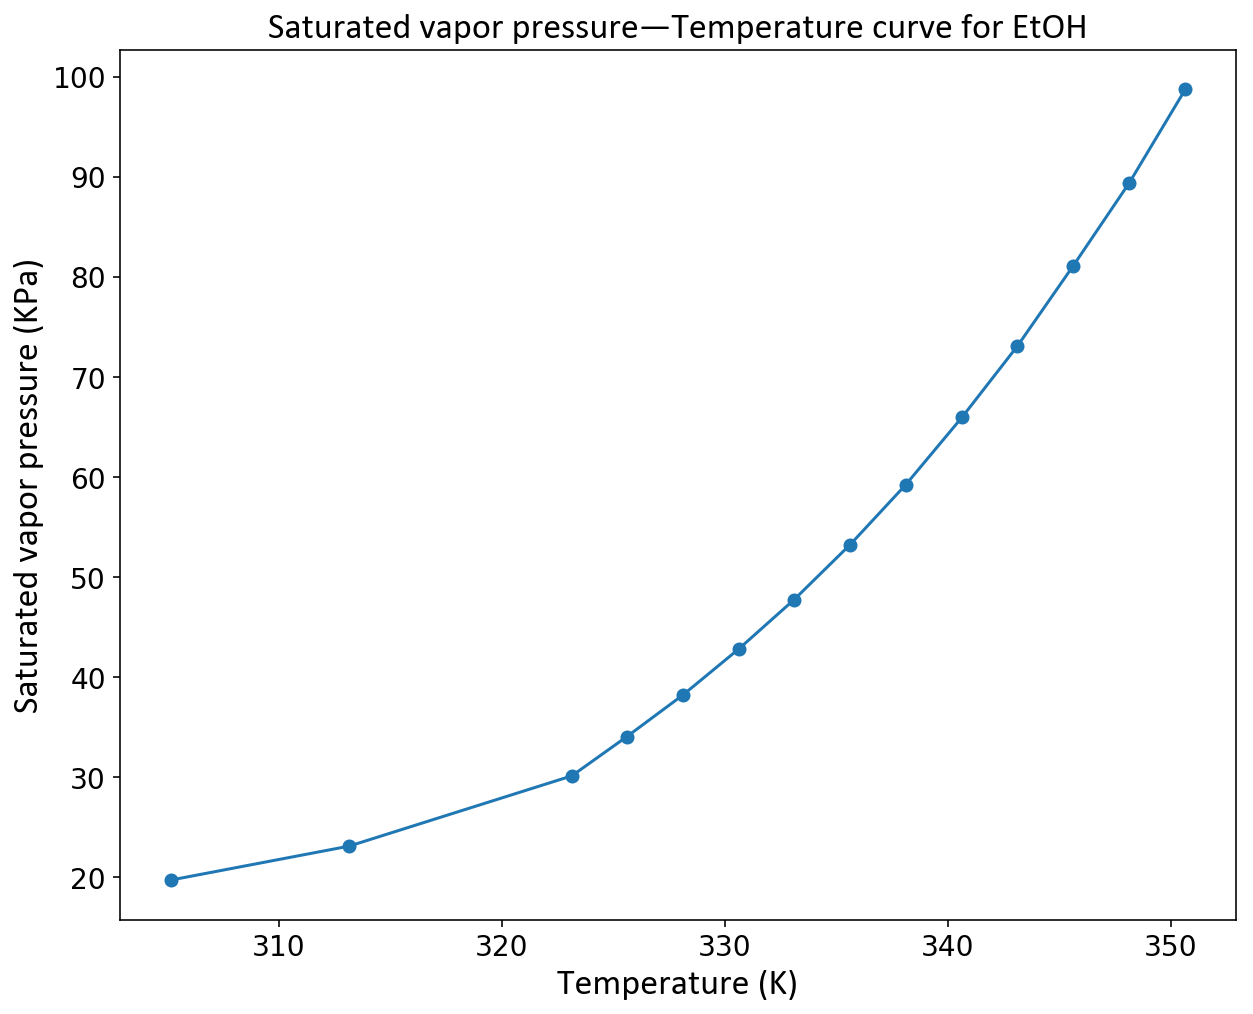

In [64]:
# T-P plot
%matplotlib inline
%config InlineBackend.figure_format='retina'
fig, ax = plt.subplots(figsize=(10,8))
T_list = df['T (°C)'].tolist()
P_list = df['real_P (Kpa)'].tolist()
ax.plot([T+273.15 for T in T_list], P_list, '-o')
ax.set_xlabel('Temperature (K)', fontname = 'Calibri', fontsize = 18)
ax.set_ylabel('Saturated vapor pressure (KPa)', fontname = 'Calibri', fontsize = 18)
plt.title('Saturated vapor pressure—Temperature curve for EtOH', fontname = 'Calibri', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [48]:
# fit the data, drop the first 3 points
stats.linregress(T_minus_1_list[3:], np.log(normalized_P_list[3:]))

LinregressResult(slope=-4852.14764958596, intercept=13.826623997015597, rvalue=-0.9999917111252882, pvalue=7.954986620812683e-23, stderr=6.585340546393506)

In [49]:
# the fitting expression
def fitting_expression(x):
    return -4852.14764958596*x+13.826623997015597

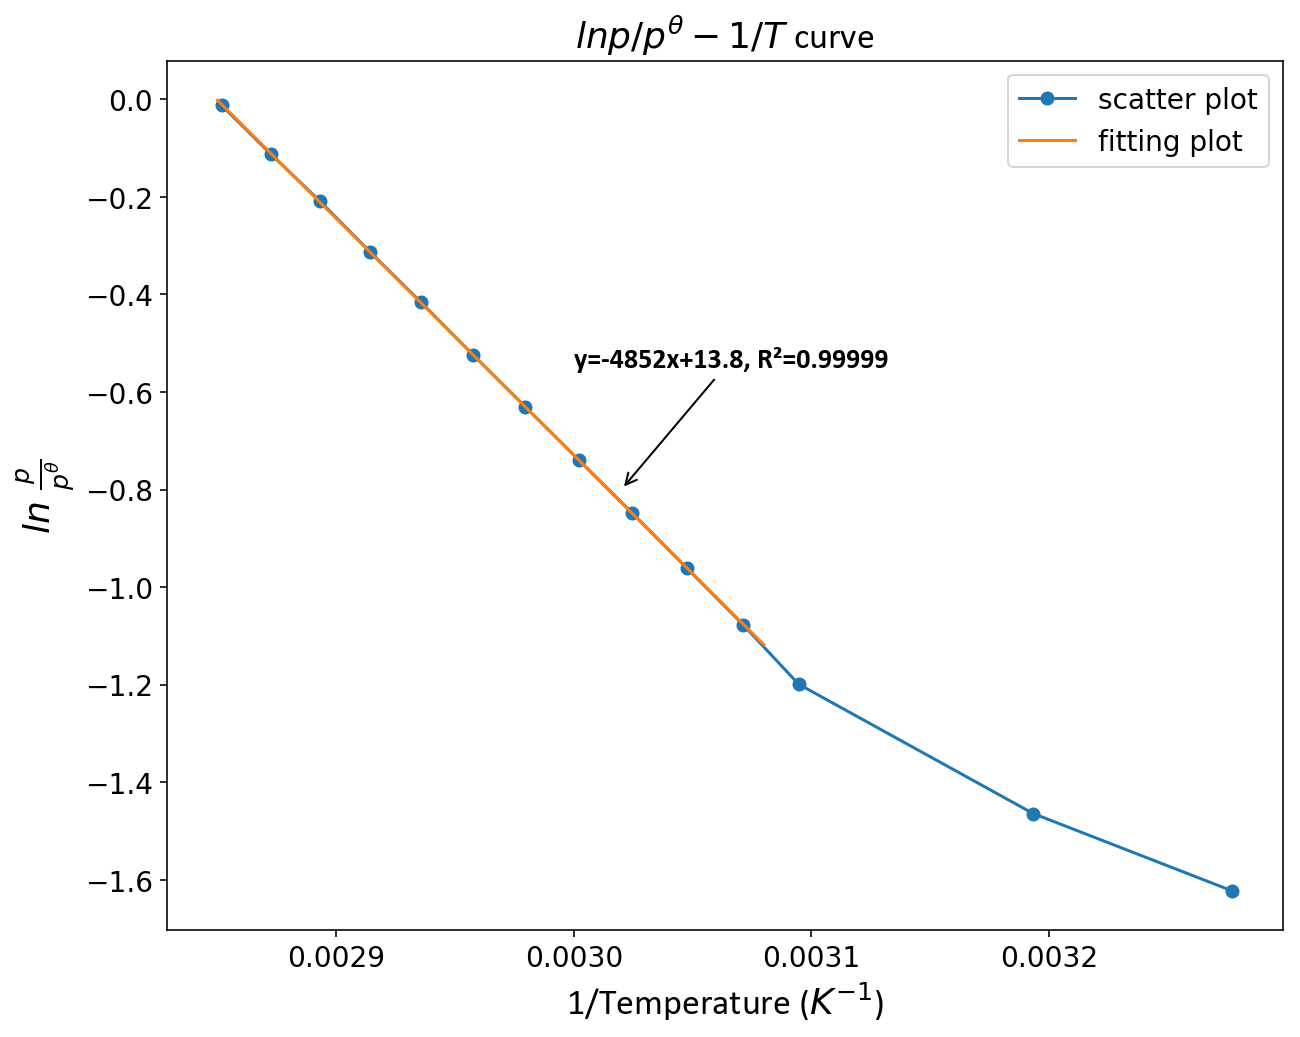

In [63]:
# ln(p/pbar)-1/T plot
fig, ax = plt.subplots(figsize=(10,8))
T_minus_1_list = [1/(T+273.15) for T in T_list]
normalized_P_list = [P/100 for P in P_list]
x_list = np.linspace(0.00285,0.00308,100)
ax.plot(T_minus_1_list, np.log(normalized_P_list), '-o')
ax.plot(x_list, [fitting_expression(x) for x in x_list])
ax.legend(['scatter plot', 'fitting plot'], fontsize = 14)
ax.set_xlabel('1/Temperature ($K^{-1}$)', fontname = 'Calibri', fontsize = 18)
ax.set_ylabel('$ln\ \\frac{p}{p^{\\theta}}$', fontname = 'Calibri', fontsize = 18)
plt.title('$lnp/p^{\\theta}-1/T$ curve', fontname = 'Calibri', fontsize = 18)
plt.annotate(s = 'y=-4852x+13.8, R²=0.99999', xy = (0.00302, -0.8), xytext = (0.003, -0.55), arrowprops={"arrowstyle":"->"}, fontsize = 14, fontname = 'Calibri', weight = 'black')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [55]:
# the boiling temperature when P = 100kPa, according to the fitting expression
print(f'the boiling temperature when P = 100kPa is {round(1/(13.826623997015597/4852.14764958596),2)} K, or {round(1/(13.826623997015597/4852.14764958596)-273.15,2)} °C')

the boiling temperature when P = 100kPa is 350.93 K, or 77.78 °C


According to Clausius-Clapeyron equation, $$ln(\frac{p}{p^{\theta}})=-\frac{\Delta_{vap}H_{m}}{RT}+A$$
the slope is $$-\frac{\Delta_{vap}H_{m}}{R}$$
then $$\Delta_{vap}H_{m}=-k\times R$$

where $k$ is the slope and $R$ is the ideal gas constant

In [70]:
# the molar heat of vaporization for EtOH
print(f'the molar heat of vaporization is {round((-4852)*(-8.314)/1000,4)} KJ/mol')

the molar heat of vaporization is 40.3395 KJ/mol


COMMENT: this is a reasonable result, compared to the literature value $42.3 ± 0.4\ KJ/mol$ (from [NIST Chemistry WebBook](https://webbook.nist.gov/cgi/cbook.cgi?ID=C64175&Units=SI&Mask=4#Thermo-Phase))

the entropy of vaporation is defined as following: $$\Delta_{vap} S=\frac{\Delta_{vap}H_{m}}{T_{b}}$$
where $T_{b}$ is the boiling temperature

In [72]:
# the entropy of vaporation
print(f'the entropy of vaporation is {round(40339.5/350.93,3)} J/(mol·K)')

the entropy of vaporation is 114.95 J/(mol·K)


(From [wikipedia](https://en.wikipedia.org/wiki/Trouton%27s_rule))
>Trouton’s rule states that the entropy of vaporization is almost the same value, about $ 85-88\ J\ K^{-1}\ mol^{-1}$, for various kinds of liquids at their boiling points.  
Mathematically, it can be expressed as: $\Delta {\bar {S}}_{vap}\approx 10.5R$, where $R$ is the ideal gas constant.

However, here the entropy of vaporization of EtOH is calculated to be $ 114.95\ J\ K^{-1}\ mol^{-1}$, which means Trouton's rule does not apply to EtOH.

This is reasonable because Trouton's rule doesn't work for liquid with hydrogen bonds, such as water and EtOH.

(Also from [wikipedia](https://en.wikipedia.org/wiki/Trouton%27s_rule))
>The entropy of vaporization of water and ethanol shows positive deviance from the rule; this is because the hydrogen bonding in the liquid phase lessens the entropy of the phase.